Let's create a regression model to predict red wine quality. We'll also apply training and validation methodologies. 

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [162]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [163]:
datasource = "datasets/winequality-red.csv"
print(os.path.exists(datasource))

True


In [164]:
df = pd.read_csv(datasource).sample(frac = 1).reset_index(drop = True)

In [165]:
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,134.0000,1317.00000,957.00000,1458.00000,490.0000
fixed acidity,7.6000,8.20000,8.70000,9.10000,7.8000
volatile acidity,0.4000,0.28000,0.78000,0.36000,0.5900
citric acid,0.2900,0.60000,0.51000,0.39000,0.1800
residual sugar,1.9000,3.00000,1.70000,1.80000,2.3000
chlorides,0.0780,0.10400,0.41500,0.06000,0.0760
free sulfur dioxide,29.0000,10.00000,12.00000,21.00000,17.0000
total sulfur dioxide,66.0000,22.00000,66.00000,55.00000,54.0000
density,0.9971,0.99828,0.99623,0.99495,0.9975
pH,3.4500,3.39000,3.00000,3.18000,3.4300


In [166]:
df.shape

(1599, 13)

In [167]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [168]:
del df["Unnamed: 0"]

In [169]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [170]:
# Let's only look at the following columns:
# volatile acidity, citric acid, 
# total sulfur dioxide
# sulphates, alcohol

X = np.array(df.iloc[:,:-1])[:, [1, 2, 6, 9, 10]]
# remove the quality column and give me all the rows
# give me all the rows and only give me columns of 
# index 1, 2, 6, 9, 10

In [171]:
y = np.array(df["quality"])

In [172]:
print(X.shape)

(1599, 5)


In [173]:
print(y.shape)

(1599,)


In [174]:
# give me the counts of each quality value in the dataset
print("Label Distribution", {i: np.sum(y == i) for i in np.unique(df.quality)})

Label Distribution {3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [176]:
m = LinearRegression() 
# create a blank model

In [177]:
m.fit(X_train, y_train) 
# train the model against the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
m.score(X_test, y_test)
# see how it performs against the test data

0.29453294208055192

This is the coefficient of determination (R Squared) of the model on this dataset. This measures the portion of total variation explained by the model.

In [179]:
mean_squared_error(y, m.predict(X))
# measure the model error based on expected
# output and predicted output
# also called MSE

0.42814971017913128

Let's print out the results to see predictions vs actual values

In [180]:
print("Actuals:")
print(y[20:55])

Actuals:
[5 6 5 5 5 5 5 5 5 6 5 6 5 4 5 6 6 6 6 5 6 5 6 6 7 6 5 5 5 5 6 5 6 6 6]


In [181]:
print("Predictions")
print(np.round(m.predict(X)[20:55]).astype("i4"))
# i4 = 32-bit signed integer type

Predictions
[5 7 5 5 5 5 5 6 6 5 5 6 5 5 5 6 6 5 6 5 6 5 5 6 6 6 5 6 5 5 6 5 5 6 6]


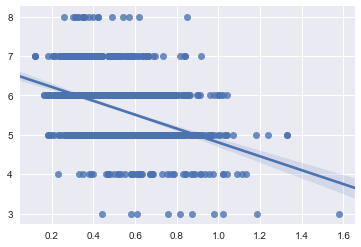

In [182]:
sns.regplot(X[:,0], y)

## Confusion Matrix

* https://en.wikipedia.org/wiki/Confusion_matrix
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

In [186]:
prediction = m.predict(X_test)
labels = [3, 4, 5, 6, 7, 8]
# Label Distribution {3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}

cm = confusion_matrix(y_test, np.round(prediction).astype("i4"), labels)
print(cm)

[[  0   0   1   0   0   0]
 [  0   0  12   6   0   0]
 [  0   1 139  53   1   0]
 [  0   0  36  95   5   0]
 [  0   0   3  32  10   0]
 [  0   0   0   5   1   0]]


In [194]:
cmdf = pd.DataFrame(cm).reset_index(drop = True)
cmdf.columns = labels
cmdf.index = labels

cmdf

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,0,12,6,0,0
5,0,1,139,53,1,0
6,0,0,36,95,5,0
7,0,0,3,32,10,0
8,0,0,0,5,1,0


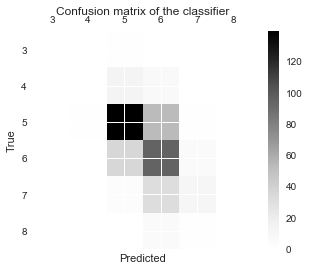

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The center diagonal (top left to bottom right) is the set of correct model predictions. The off diagonal counts are the errors. This gives a per class-pair breakdown of the model performance. 

<div style="color: red;">NOTE:</div>
<div style="color: red;">Note that we think of wine quality as an ordinal value but we're using regression which predicts continuous values. We're purposely looking at this problem with suboptimal tools to illustrate the various concepts!</div>

Let's reduce this down to a 2 class (binary) problem. A 2 class regression can be used (Logistic Regression). 

* Quality value less than 6 is bad = 0
* Quality value that is 6 or greater is good = 1

In [195]:
y[y < 6] = 0
y[y >= 6] = 1

In [196]:
print("X", X.shape)

X (1599, 5)


In [197]:
print("y", y.shape)

y (1599,)


In [198]:
print("Label Distribution", {0: np.sum(y == 0), 1: np.sum(y == 1)})

Label Distribution {0: 744, 1: 855}


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
m = LogisticRegression()
m.fit(X_train, y_train)
m.score(X_test, y_test)

0.76249999999999996